In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
df=pd.read_csv("international-airline-passengers.csv")
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
cols=["Month",'Passenger']
df.columns=cols

In [8]:
df.drop(144,inplace=True)

In [5]:
df.head()

,Month,Passenger
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
df.tail()

,Month,Passenger
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


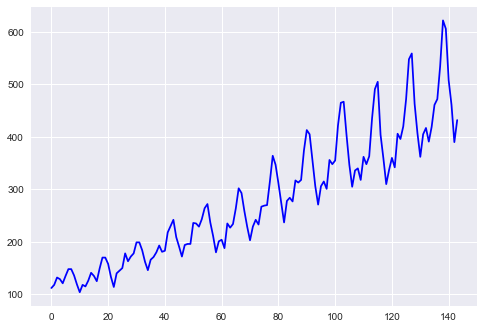

In [7]:
plt.plot(df.Passenger,c="blue")
plt.show()

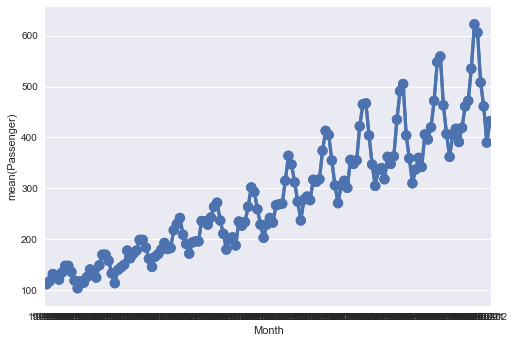

In [18]:
sns.pointplot(df.Month,df.Passenger)
plt.show()

In [8]:
dataframe = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [9]:
dataframe.tail()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,606
140,508
141,461
142,390
143,432


In [10]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
#(Long Short Term Memory)
#Short Long term Memory

Using TensorFlow backend.


In [12]:
dataset=dataframe.values.astype(np.float32)

In [15]:
dataset[0:5]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
dataset=scaler.fit_transform(dataset)

In [19]:
train_size= int(len(dataset)*0.8)
test_size= len(dataset)-train_size
train,test=dataset[0:train_size],dataset[train_size:len(dataset)]

In [20]:
train.shape

(115, 1)

In [21]:
test.shape

(29, 1)

In [22]:
dataset.shape

(144, 1)

In [23]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [24]:
ssX,ssY = create_dataset(train)

In [25]:
ssX[0:6]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557]], dtype=float32)

In [26]:
ssY[0:5]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557],
      dtype=float32)

In [27]:
look_back=5
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [28]:
trainX.shape

(109, 5)

In [29]:
trainX[0:6]

array([[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557],
       [0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207],
       [0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207],
       [0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607],
       [0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753]],
      dtype=float32)

In [30]:
trainY.shape

(109,)

In [31]:
trainY[0:5]

array([0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753],
      dtype=float32)

In [32]:
testX.shape

(23, 5)

In [33]:
testY.shape

(23,)

In [34]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [35]:
trainX.shape

(109, 1, 5)

In [36]:
testX.shape

(23, 1, 5)

In [37]:
trainX[0:6]

array([[[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853]],

       [[0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557]],

       [[0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207]],

       [[0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207]],

       [[0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607]],

       [[0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753]]],
      dtype=float32)

In [38]:
trainY[0:5]

array([0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753],
      dtype=float32)

In [39]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='relu'))
model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mean_squared_error'])

In [40]:
model.fit(trainX,trainY,epochs=150,verbose=2,batch_size=1)

Epoch 1/150
 - 3s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 2/150
 - 1s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 3/150
 - 1s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 4/150
 - 1s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 5/150
 - 1s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 6/150
 - 1s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 7/150
 - 1s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 8/150
 - 1s - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 9/150
 - 1s - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 10/150
 - 1s - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 11/150
 - 1s - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 12/150
 - 1s - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 13/150
 - 1s - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 14/150
 - 1s - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 15/150
 - 1s - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 16/150
 - 1s - loss: 0.0033 - mean_squared_error: 0.0033
E

In [41]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

In [263]:
trainPredict[0:5]

array([[0.02427245],
       [0.04604151],
       [0.07286955],
       [0.07335056],
       [0.05008391]], dtype=float32)

In [264]:
testPredict[0:5]

array([[0.46068513],
       [0.4915492 ],
       [0.44804233],
       [0.5353711 ],
       [0.52308655]], dtype=float32)

In [42]:
trainPredict=scaler.inverse_transform(trainPredict)
testPredict=scaler.inverse_transform(testPredict)
trainYI=scaler.inverse_transform(trainY)
testYI=scaler.inverse_transform(testY)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [266]:
trainPredict[0:5]

array([[116.573135],
       [127.8495  ],
       [141.74641 ],
       [141.9956  ],
       [129.94347 ]], dtype=float32)

In [267]:
trainYI[0:7]

array([135., 148., 148., 136., 119., 104., 118.], dtype=float32)

In [268]:
trainY.shape

(109,)

In [269]:
trainPredict.shape

(109, 1)

In [43]:
print ("Score of RMSE train : {}".format(np.sqrt(mean_squared_error(trainYI,np.squeeze(trainPredict)))))

Score of RMSE train : 24.588420867919922


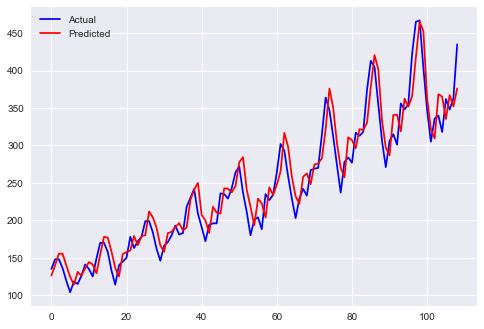

In [44]:
plt.plot(trainYI,c="blue",label="Actual")
plt.plot(trainPredict,c="red",label="Predicted")
plt.legend()
plt.show()

In [45]:
testYI[0:5]

array([360.     , 342.     , 406.     , 395.99997, 420.     ],
      dtype=float32)

In [46]:
testPredict[0:6]

array([[377.6777 ],
       [382.9135 ],
       [359.37106],
       [409.6341 ],
       [389.41415],
       [423.72607]], dtype=float32)

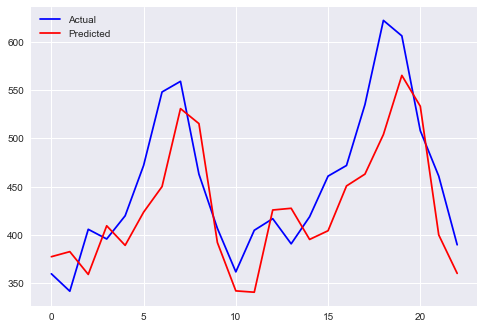

In [47]:
plt.plot(testYI,c="blue",label="Actual")
plt.plot(testPredict,c="red",label="Predicted")
plt.legend()
plt.show()

In [48]:
print ("Score of RMSE train : {}".format(np.sqrt(mean_squared_error(testYI,np.squeeze(testPredict)))))

Score of RMSE train : 49.78209686279297
